In [225]:
#Importing  required libraries :
import pandas as pd 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("popular")
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data

In [226]:
#Importing the dataset, removing the unnecesary columns and creating features and labels set.
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
Data=Data.drop(columns=['id'])
feature=Data.iloc[:,1].values
labels=Data.iloc[:,0].values

In [227]:
feature


array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

In [228]:
#Printing the shape and the details of the columns in the dataframe.
shape= Data.shape
print(shape)
columns=Data.columns
print(columns)

(31962, 2)
Index(['label', 'tweet'], dtype='object')


In [229]:
#Information about the Dataframe
Data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [230]:
#To display the count of positive and negative tweets.
count=Data.label.value_counts()
count

0    29720
1     2242
Name: label, dtype: int64

In [231]:
#To check if there are any null values in the dataset
Data.isnull().values.any()

False

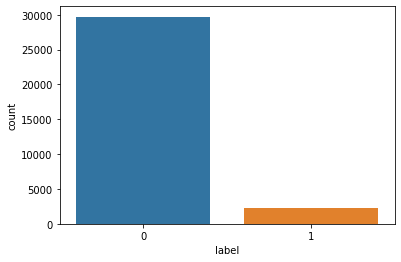

In [232]:
#Representing the count of positive and negative tweets using a bargraph
import seaborn as sns
sns.countplot(x='label',data=Data)

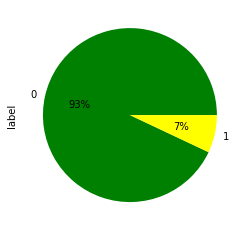

In [233]:
#Representing the count of positive and negative tweets using a pie chart
count.plot(kind='pie',autopct='%1.0f%%',colors=["green","yellow"])

In [234]:
#Data Pre-Processing
words=[]
import re
for sentence in range(0,len(feature)):
   # Removing twitter handles
   feature_processed = " ".join([word for word in  feature[sentence].split()
                              if 'http' not in word and '@' not in word and '<' not in word])
   # Converting to Lower Case
   feature_processed  =  feature_processed .lower()
   #Remove Operators and Expressions
   feature_processed =re.sub('[!@#$:).;,?&/'']', '',   feature_processed )
   # Remove spaces
   feature_processed = re.sub('  ', ' ',   feature_processed )
   # Remove single quotes
   feature_processed  =   feature_processed .replace('\'','',)
   #Remove special characters
   feature_processed = re.sub('[^(A-Z,a-z,0-9)]',' ',  feature_processed )
   # Remove all the single characters
   feature_processed = re.sub(r'\s+[a-zA-Z]\s+', ' ',  feature_processed )
    # Substitute multiple spaces with a single space
   feature_processed  = re.sub(r'\s+', ' ',  feature_processed , flags=re.I)  
   words.append( feature_processed )


In [235]:
# Tweets after Pre-Processing
words

['when father is dysfunctional and is so selfish he drags his kids into his dysfunction run',
 'thanks for lyft credit cant use cause they dont offer wheelchair vans in pdx disapointed getthanked',
 'bihday your majesty',
 'model love take with all the time in ur ',
 'factsguide society now motivation',
 ' 22 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo',
 'camping tomorrow danny ',
 'the next school year is the year for exams cant think about that school exams hate imagine actorslife revolutionschool girl',
 'we won love the land allin cavs champions cleveland clevelandcavaliers ',
 'welcome here im its so gr8 ',
 ' ireland consumer price index (mom climbed from previous 02 to 05 in may blog silver gold forex',
 'we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love ',
 'i get to see my daddy today 80days gettingfed',
 'cnn calls michigan middle school build t

In [236]:
#Removing stop words 

from nltk.tokenize import word_tokenize 
  
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(str(words)) 
  

filtered_sentence = [w for w in word_tokens if not w in stop_words]   
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  

print(filtered_sentence[0:100]) 

['[', "'when", 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run', "'", ',', "'thanks", 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked', "'", ',', "'bihday", 'majesty', "'", ',', "'model", 'love', 'take', 'time', 'ur', "'", ',', "'factsguide", 'society', 'motivation', "'", ',', "'", '22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo', "'", ',', "'camping", 'tomorrow', 'danny', "'", ',', "'the", 'next', 'school', 'year', 'year', 'exams', 'cant', 'think', 'school', 'exams', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl', "'", ',', "'we", 'love', 'land', 'allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers', "'", ',', "'welcome", 'im', 'gr8', "'", ',', "'", 'ireland', 'consumer', 'price', 'index', '(']


In [237]:
# Sentence Tokenizations
sentence=sent_tokenize(str(words))
print(sentence)


["['when father is dysfunctional and is so selfish he drags his kids into his dysfunction run', 'thanks for lyft credit cant use cause they dont offer wheelchair vans in pdx disapointed getthanked', 'bihday your majesty', 'model love take with all the time in ur ', 'factsguide society now motivation', ' 22 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo', 'camping tomorrow danny ', 'the next school year is the year for exams cant think about that school exams hate imagine actorslife revolutionschool girl', 'we won love the land allin cavs champions cleveland clevelandcavaliers ', 'welcome here im its so gr8 ', ' ireland consumer price index (mom climbed from previous 02 to 05 in may blog silver gold forex', 'we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love ', 'i get to see my daddy today 80days gettingfed', 'cnn calls michigan middle school build the wall cha

In [238]:
# Word Tokenizations
token = word_tokenize(str(words))
print(token[0:100])

['[', "'when", 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run', "'", ',', "'thanks", 'for', 'lyft', 'credit', 'cant', 'use', 'cause', 'they', 'dont', 'offer', 'wheelchair', 'vans', 'in', 'pdx', 'disapointed', 'getthanked', "'", ',', "'bihday", 'your', 'majesty', "'", ',', "'model", 'love', 'take', 'with', 'all', 'the', 'time', 'in', 'ur', "'", ',', "'factsguide", 'society', 'now', 'motivation', "'", ',', "'", '22', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there', 'allshowandnogo', "'", ',', "'camping", 'tomorrow', 'danny', "'", ',', "'the", 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams', 'cant', 'think', 'about', 'that', 'school']


In [239]:
# Stemming 
ps = PorterStemmer() 
   

token = word_tokenize(str(words[0:10])) 
   
for w in token: 
    print(w, " : ", ps.stem(w)) 

[  :  [
'when  :  'when
father  :  father
is  :  is
dysfunctional  :  dysfunct
and  :  and
is  :  is
so  :  so
selfish  :  selfish
he  :  he
drags  :  drag
his  :  hi
kids  :  kid
into  :  into
his  :  hi
dysfunction  :  dysfunct
run  :  run
'  :  '
,  :  ,
'thanks  :  'thank
for  :  for
lyft  :  lyft
credit  :  credit
cant  :  cant
use  :  use
cause  :  caus
they  :  they
dont  :  dont
offer  :  offer
wheelchair  :  wheelchair
vans  :  van
in  :  in
pdx  :  pdx
disapointed  :  disapoint
getthanked  :  getthank
'  :  '
,  :  ,
'bihday  :  'bihday
your  :  your
majesty  :  majesti
'  :  '
,  :  ,
'model  :  'model
love  :  love
take  :  take
with  :  with
all  :  all
the  :  the
time  :  time
in  :  in
ur  :  ur
'  :  '
,  :  ,
'factsguide  :  'factsguid
society  :  societi
now  :  now
motivation  :  motiv
'  :  '
,  :  ,
'  :  '
22  :  22
huge  :  huge
fan  :  fan
fare  :  fare
and  :  and
big  :  big
talking  :  talk
before  :  befor
they  :  they
leave  :  leav
chaos  :  chao
and  : 

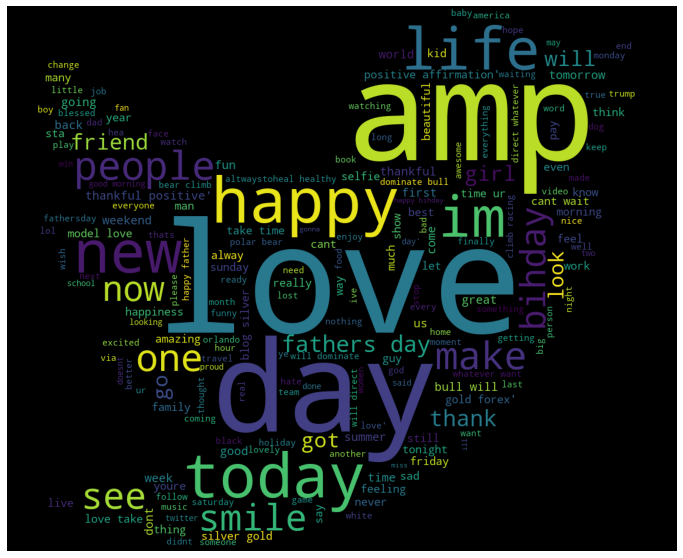

In [240]:
#Importing libraries for word cloud
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(str(words))

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

In [241]:
# To print the frequency of the words 
setwords=[]
for i in range(0,len(words)):
  word=words[i].split()
  setwords.append(word)

In [242]:
# To print the frequency of the words and creating a dataframe
import itertools
import collections
all_words=list(itertools.chain(*setwords))
print(all_words[0:30])
words_freq=collections.Counter(all_words)
freq_word=pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word

['when', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run', 'thanks', 'for', 'lyft', 'credit', 'cant', 'use', 'cause', 'they', 'dont', 'offer', 'wheelchair', 'vans', 'in', 'pdx']


,words,Freq
0,the,10201
1,to,9855
2,you,5483
3,and,4905
4,in,4665
5,for,4495
6,of,4252
7,is,4186
8,my,3688
9,love,2738


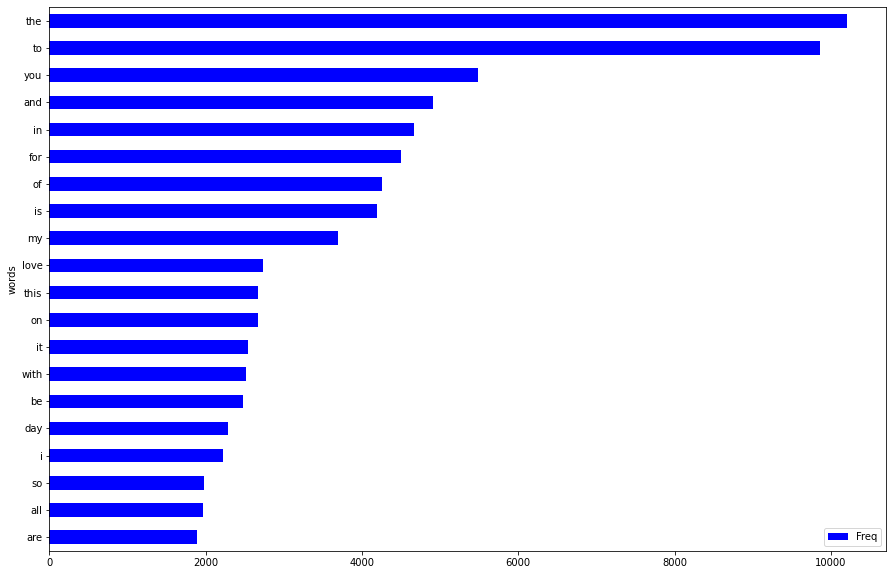

In [243]:
#Visualizing the frequency of words using a bar graph
flg,ax=plt.subplots(figsize=(15,10))
freq_word.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='blue')
plt.show();

In [244]:
#TFIDFVEctorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
words = vectorizer.fit_transform(words).toarray()


In [245]:
#Splitting into Testing and Training Dataset 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(words, labels, test_size=0.2, random_state=0)

In [246]:
#Shape of X_train
x_train.shape

(25569, 2500)

In [247]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [248]:
# Accuracy, confusion matrix and classification report for random forest classifier
predictions = text_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[5928   57]
 [ 195  213]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.79      0.52      0.63       408

    accuracy                           0.96      6393
   macro avg       0.88      0.76      0.80      6393
weighted avg       0.96      0.96      0.96      6393

0.9605818864382919


In [249]:
# Support Vector Machine
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [250]:
# Accuracy, confusion matrix and classification report for SVM
y_pred = svclassifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[5950   35]
 [ 229  179]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5985
           1       0.84      0.44      0.58       408

    accuracy                           0.96      6393
   macro avg       0.90      0.72      0.78      6393
weighted avg       0.95      0.96      0.95      6393

0.9587048334115439
